In [10]:
import torch
from network import *
from utils import *
from dataset import *

In [11]:
import os

In [12]:
os.listdir("Networks")

['.ipynb_checkpoints',
 'GoldenAgePanels_JigsawNetwork_2021-6-25-15-40-16',
 'GoldenAgePanels_JigsawNetwork_2021-6-25-19-34-52']

In [13]:
PATH = "Networks/GoldenAgePanels_JigsawNetwork_2021-6-25-15-40-16/checkpoint_ep34.pth.tar"

In [14]:
opt           = read_config("configs/training_configs.yaml")
jigsaw_config = read_config("configs/jigsaw_gold_panels.yaml")

In [15]:
model = ResNet50(opt)
model.load_state_dict(torch.load(PATH)['state_dict'])
model.cuda().eval();

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [16]:
val_dataset  = GoldenPanels_Jigsaw_Dataset(images_path = jigsaw_config.panel_path,
                         annotation_path = jigsaw_config.panels_annotation,
                         permutation_path = jigsaw_config.permutation_path,                
                         panel_dim = jigsaw_config.panel_dim ,
                         num_panels = jigsaw_config.num_panels,
                         train_test_ratio = jigsaw_config.train_test_ratio,
                         normalize = False,
                         train_mode = False,
                         limit_size = 1000)

In [17]:
data_loader = DataLoader(val_dataset, batch_size=1)
dl_iter = iter(data_loader)



In [18]:

batch = next(dl_iter)

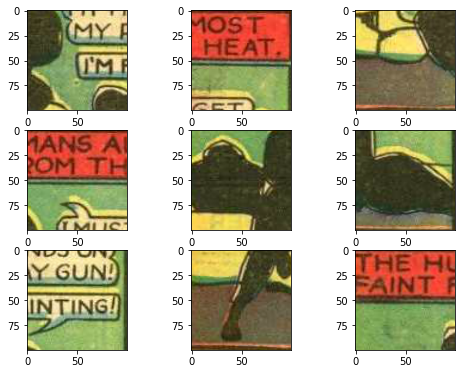

In [19]:
plot_tiles(val_dataset, 232)

Current Permutation [7 8 4 1 6 5 2 3 0]
recon_images shpape :  torch.Size([1, 3, 300, 300])


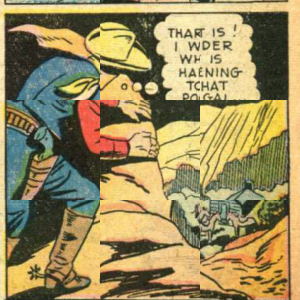

In [20]:
image = plot_resorted_image(batch, val_dataset)
image

Current Permutation [4 6 7 5 0 1 3 2 8]
recon_images shpape :  torch.Size([1, 3, 300, 300])


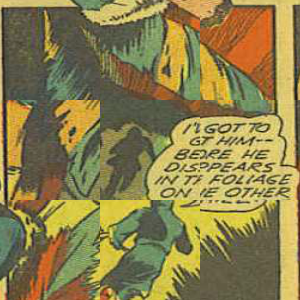

In [21]:

batch = next(dl_iter)
im = plot_resorted_image(batch, val_dataset)
im

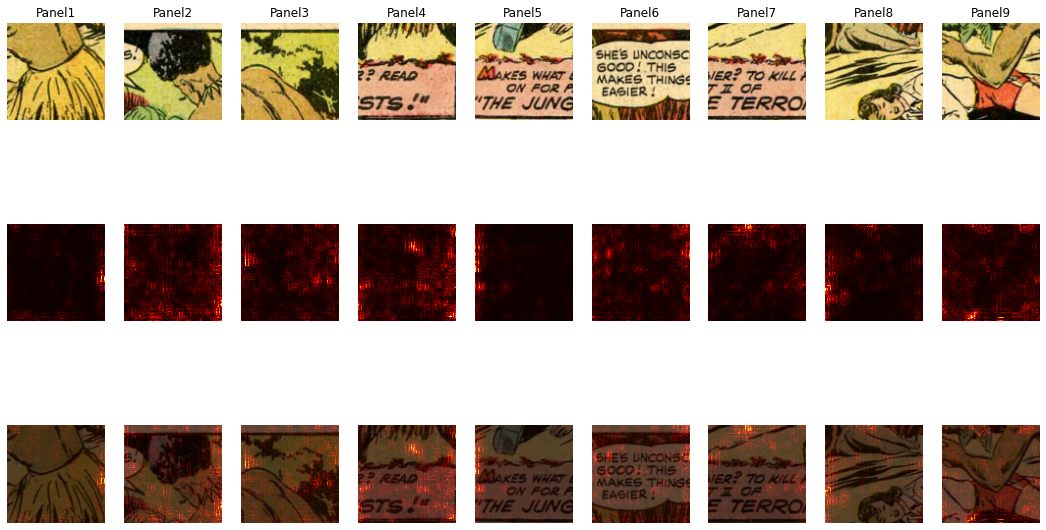

In [26]:
batch = next(dl_iter)
draw_jigsaw_saliency(model, batch, val_dataset)


Current Permutation [7 3 6 8 2 0 5 1 4]
recon_images shpape :  torch.Size([1, 3, 300, 300])
Current Permutation [7 3 6 8 2 0 5 1 4]
recon_images shpape :  torch.Size([1, 3, 300, 300])


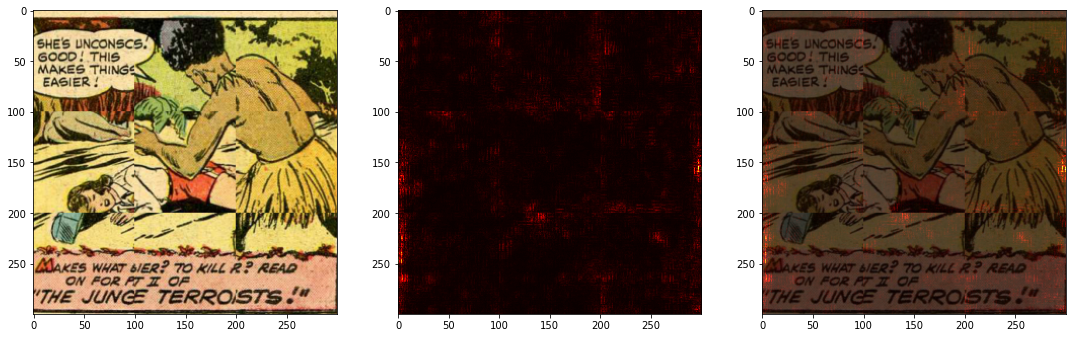

In [27]:
newPlot(model, batch, val_dataset)